# Autofig Limits

In [1]:
import autofig
import numpy as np

In [2]:
#autofig.inline()

In [3]:
t = np.linspace(0, 2*np.pi, 101)
x = np.sin(t)
y1 = np.cos(t)
y2 = -0.5*y1
y3 = 1.5*y1

Here we'll explore the different limit-styles on two plots - the first (blue) where the independent-variable is in the x-dimension, and the second (red) with an external independent-variable.  We'll also throw a green line on each with "consider_for_limits" set to False.  This means that it will still be drawn in each frame but will not affect any automatically determined limits.

For the sake of consistency, we'll leave the padding at its default value of 10% throughout.

In [4]:
fig1 = autofig.Figure()
fig1.plot(x=t, y=y1, i='x', marker='None', color='b', linestyle='solid', uncover=True)
fig1.plot(x=t, y=y2, i='x', marker='None', color='b', linestyle='dashed', uncover=True)
fig1.plot(x=t, y=y3, i='x', marker='None', color='g', linestyle='dashdot', 
          uncover=True, consider_for_limits=False)
mplfig = autofig.draw()

In [5]:
fig2 = autofig.Figure()
fig2.plot(x=x, y=y1, i=t, marker='None', c='r', linestyle='solid', uncover=True)
fig2.plot(x=x, y=y2, i=t, marker='None', c='r', linestyle='dashed', uncover=True)
fig2.plot(x=x, y=y3, i=t, marker='None', c='g', linestyle='dashed', 
          uncover=True, consider_for_limits=False)
mplfig = autofig.draw()

**NOTE:** setting axes limits (or any axes property, for that matter) is possible directly from the plot call via the xlim keyword.  Note that the latest value sent to that axes will take priority.

## Automatic Fixed-Limits (default)

By default all limits are set to (None, None) which means that both the upper and lower bounds of the limits will be set automatically based on *all* (not just currently visible) data.

**NOTE**: this is equivalent to setting limits to 'fixed'.

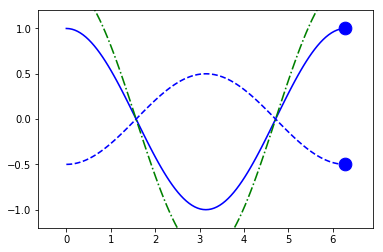

In [6]:
fig1.axes[0].x.lim = (None, None)
anim = fig1.animate(i=t[::2], 
                   save='limits_fig1_fixed_automatic.gif', save_kwargs={'writer': 'imagemagick'})

![animation](limits_fig1_fixed_automatic.gif)

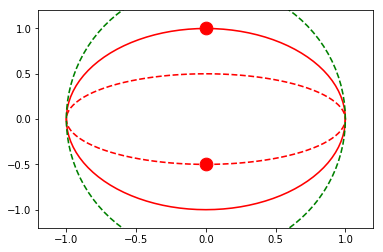

In [7]:
fig2.axes[0].x.lim = (None, None)
anim = fig2.animate(i=t[::2],
                    save='limits_fig2_fixed_automatic.gif', save_kwargs={'writer': 'imagemagick'})

![animation](limits_fig2_fixed_automatic.gif)

## Automatic Symmetric Fixed-Limits

By setting the limits to 'symmetric', the limits will be computed as above, but forced to be symmetric about zero.

In [8]:
fig1.axes[0].x.lim = 'symmetric'
anim = fig1.animate(i=t[::2],
                    save='limits_fig1_fixed_symmetric.gif', save_kwargs={'writer': 'imagemagick'})

![animation](limits_fig1_fixed_symmetric.gif)

## User-Defined Fixed-Limits

By manually setting either or both of the bounds on the limits, we can override the automatic behavior, but still get fixed limits throughout the animation.

**NOTE**: padding is not applied on top of a provided value.

**TODO**: since the ylim are still auto-fixed, they are going on *all* of the data, not just the visible data in the visible x-range.  I'm not quite sure the best way to handle this...

In [9]:
fig1.axes[0].x.lim = (1,2)
fig1.axes[0].y.lim = (None, None)
anim = fig1.animate(i=t[::2],
                    save='limits_fig1_fixed_user.gif', save_kwargs={'writer': 'imagemagick'})

![animation](limits_fig1_fixed_user.gif)

We can of course allow either the lower or upper bound to still remain automatic:

In [10]:
fig1.axes[0].x.lim = (None, 4)
fig1.axes[0].y.lim = (None, None)
anim = fig1.animate(i=t[::2],
                    save='limits_fig1_fixed_user_upper.gif', save_kwargs={'writer': 'imagemagick'})

![animation](limits_fig1_fixed_user_upper.gif)

and we can also set fixed limits for the y-limits:

In [11]:
fig1.axes[0].x.lim = (1,2)
fig1.axes[0].y.lim = (-0.5,0.5)
anim = fig1.animate(i=t[::2],
                    save='limits_fig1_fixed_xy.gif', save_kwargs={'writer': 'imagemagick'})

![animation](limits_fig1_fixed_xy.gif)

For completeness, we'll include an example with the external independent-variable as well:

In [12]:
fig2.axes[0].x.lim = (-0.5, 0.5)
fig2.axes[0].y.lim = (None, None)
anim = fig2.animate(i=t[::2],
                    save='limits_fig2_fixed_user.gif', save_kwargs={'writer': 'imagemagick'})

![animation](limits_fig2_fixed_user.gif)

## Automatic Sliding-Limits

By setting the limits to a single value instead of a tuple, the range of the limits will remain fixed, re-centering on the "current" value for each frame (where this centered value is determined as the *average* position of the highlighted markers, ignoring any in which consider_for_limits=False).

By setting this single value to None, the range itself will automatically be determined.  The range is determined as follows:

* if there is any spread in the central positions, the range is set as pad*max(spread)
* 10% of the full axes
* **NOT YET IMPLEMENTED**: the maximum range needed to contain the mesh plots

**NOTE**: this is equivalent to setting limits to 'sliding'

**NOTE**: the automatic determination of range is somewhat computationally expensive.  To save time, provide the range as shown in the following section.

In [13]:
fig1.axes[0].x.lim = None
fig1.axes[0].y.lim = (None, None)
anim = fig1.animate(i=t[::2],
                   save='limits_fig1_sliding_automatic.gif', save_kwargs={'writer': 'imagemagick'})

![animation](limits_fig1_sliding_automatic.gif)

In the example above, since the independent-variable is in the same direction as the sliding axes, there is no spread in the x-direction of the current points.  Therefore the range fallsback on 10% of the full range.

Let's instead set the y-limits to sliding.

In [14]:
fig1.axes[0].x.lim = (None, None)
fig1.axes[0].y.lim = None
anim = fig1.animate(i=t[::2],
                    save='limits_fig1_sliding_y.gif', save_kwargs={'writer': 'imagemagick'})

![animation](limits_fig1_sliding_y.gif)

In [15]:
fig2.axes[0].x.lim = (None, None)
fig2.axes[0].y.lim = None
anim = fig2.animate(i=t[::2],
                    save='limits_fig2_sliding_y.gif', save_kwargs={'writer': 'imagemagick'})

![animation](limits_fig2_sliding_y.gif)

To truly center the central values, we can allow both limits to automatically slide.

In [16]:
fig2.axes[0].x.lim = None
fig2.axes[0].y.lim = None
anim = fig2.animate(i=t[::2], 
                    save='limits_fig2_sliding_xy.gif', save_kwargs={'writer': 'imagemagick'})

![animation](limits_fig2_sliding_xy.gif)

## User-Defined Sliding-Limits

By setting the limits to a single float, the range used during sliding limits can manually be set.

In [17]:
fig1.axes[0].x.lim = 4.0
fig1.axes[0].y.lim = (None, None)
anim = fig1.animate(i=t[::2], 
                    save='limits_fig1_sliding_user.gif', save_kwargs={'writer': 'imagemagick'})

![animation](limits_fig2_sliding_user.gif)

In [18]:
fig2.axes[0].x.lim = 4.0
fig2.axes[0].y.lim = (None, None)
anim = fig2.animate(i=t[::2],
                    save='limits_fig2_sliding_user.gif', save_kwargs={'writer': 'imagemagick'})

![animation](limits_fig2_sliding_user.gif)

Here we'll provide a user-defined range in a dimension that differs between the two plotted calls.  Note how the axes limits are centered on the average value between the two highlighted points at any given frame.

In [19]:
fig2.axes[0].x.lim = (None, None)
fig2.axes[0].y.lim = 4.0
anim = fig2.animate(i=t[::2], 
                    save='limits_fig2_sliding_user_y.gif', save_kwargs={'writer': 'imagemagick'})

![animation](limits_fig2_sliding_user_y.gif)

## Automatic Per-Frame Limits

By setting the limits to 'frame', they are automatically determined *per-frame* based on the settings provided by uncover and padding.

In [20]:
fig1.axes[0].x.lim = 'frame'
fig1.axes[0].y.lim = (None, None)
anim = fig1.animate(i=t[::2],
                    save='limits_fig1_frame.gif', save_kwargs={'writer': 'imagemagick'})

/usr/lib/python2.7/dist-packages/matplotlib/axes/_base.py:2961: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))


![animation](limits_fig1_frame.gif)

In [21]:
fig1.axes[0].x.lim = 'frame'
fig1.axes[0].y.lim = 'frame'
anim = fig1.animate(i=t[::2],
                    save='limits_fig1_frame_xy.gif', save_kwargs={'writer': 'imagemagick'})

![animation](limits_fig1_frame_xy.gif)

Because these are recomputed per-frame, the result for external independent-variables can look a little different as the axes can be stretched in any direction to account for the "addition" of new data.

In [22]:
fig2.axes[0].x.lim = 'frame'
fig2.axes[0].y.lim = (None, None)
anim = fig2.animate(i=t[::2],
                    save='limits_fig2_frame.gif', save_kwargs={'writer': 'imagemagick'})

![animation](limits_fig2_frame.gif)

In [23]:
fig2.axes[0].x.lim = 'frame'
fig2.axes[0].y.lim = 'frame'
anim = fig2.animate(i=t[::2],
                    save='limits_fig2_frame_xy.gif', save_kwargs={'writer': 'imagemagick'})

![animation](limits_fig2_frame_xy.gif)